*看到知乎上某大神的一个[线性回归实例](https://zhuanlan.zhihu.com/p/36553041)，描述很清晰，跟着一起做下后对线性回归有了一个整体的认识*

# 线性回归

## 0. 引言

线性回归可以说是机器学习中最简单的一种模型了，在很多问题上，如果特征工程做的足够好，线性模型已经足够解决很大一部分问题了，这也符合在机器学习中公认的奥卡姆剃刀原则(Ockham's Razor)，在解决实际问题时，尽量选择简单有效的模型。

虽然线性回归的模型简单，但其解决问题的基本流程与其他机器学习问题大同小异，都会涉及到问题定义、目标函数、损失函数、优化与验证等环节。总的来说，通过线性回归的实验来认识机器学习工程的整体架构是学习机器学习非常好的方法。

开始之前少不了的机器学习三件套
- numpy
- sklearn
- matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## 1. 问题设定

已知有$N$个$x,y$对构成的数据集$X,Y$，其中$x$是特征值，$y$是目标值，我们的目的是通过给定的数据集学习出一种模式，当给出一个新的特征$x^\prime$，能够推断出其对应的目标值$y^\prime$。

这里先模拟100个样本组成的数据集，其分布大致符合线性函数$y=2x+3$，为了更好的模拟真实情况，在生成数据时会添加一个微小的偏移量。当然，这里的函数$y=2x+3$事先我们并不知道，我们唯一能拿到的只有一堆$x$和$y$组成的数据对，而我们的目的就是要通过这些数据对去反推出某个符合条件的函数。

最终得到的数据分布如下所示：

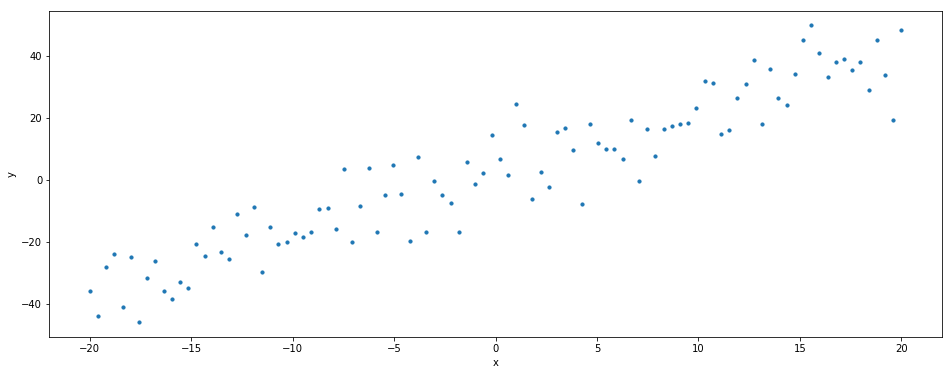

In [2]:
data_count = 100
x_data = np.linspace(-20, 20, data_count)
y_data = np.multiply(2, x_data) + 3 + np.random.normal(loc=0, scale=8.0, size=(data_count,))

plt.figure(figsize=(16, 6))
plt.scatter(x_data, y_data, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

通过观察可以发现，数据集中$X$和$Y$的分布近似呈线性关系，于是我们很自然地联想到可以将问题转化为求一个关于$x$和$y$的线性函数$y=wx+b$，当有新的样本$x^\prime$抵达时，我们只需将其输入到函数中便可以得到其对应的目标值$y^\prime$，这就是我们所说的**线性回归**

## 2. 定义目标函数

- $h(x)=wx+b$

其中$x$是特征变量，$w$和$b$是函数的参数

我们的目标是通过该函数拟合数据集$X,Y$的分布，即对每一个取值$x_i$，其对应的函数值$h(x_i)$要尽可能的接近样本的真实值$y_i$

但是目前而言，$w$和$b$的值是未知的，而一旦定义好$w$和$b$的取值，最终的函数也就确定了，我们也就可以使用该函数对新的自变量$x$进行预测了

于是，问题又转变成了求线性方程的参数$w$和$b$，来确定目标函数的最终形态

最简单的方法就是像下面这样随机给定一组$w,b$：

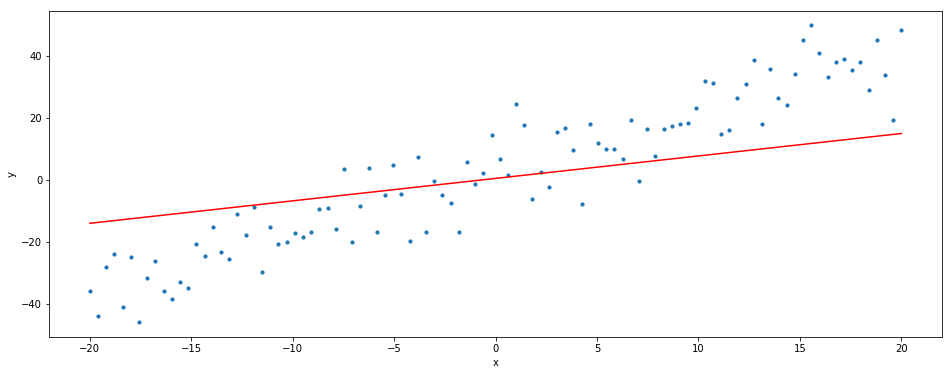

In [3]:
w = np.random.rand()
b = np.random.rand()
y_predict = w * x_data + b

plt.figure(figsize=(16, 6))
plt.scatter(x_data, y_data, s=10)
plt.plot(x_data, y_predict, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

显然，这种方法无法很好的完成任务，有相当一部分样本与该函数的图形存在较大偏差，这样的情况我们通常称为**欠拟合**。

为了解决这个问题，我们需要探寻某种方法来获得一组相对优质的参数$w,b$，这组参数应该能使目标函数尽可能的拟合数据集的分布。

容易看出，对于数据集中的一个特征值$x_i$，其对应的目标值$y_i$与函数值$h(x_i)$的距离越接近，则函数对数据的拟合程度越好，而对于整个数据集来说，就是所有样本的目标值与函数值距离的和最小，这就是我们所说的**损失函数**。

## 3. 定义损失函数

- $loss(w,b)=\frac{1}{N}\sum_{i=0}^{N}(h(x_i)-y_i)^2$

这里定义的损失函数被称作平方损失，定义是所有样本误差平方和，选取的参数使得该函数值越小，则目标函数对数据集的拟合程度就越小，当然，这种方法也有弊端，就是对数据集中的异常数据较为敏感，反应到最终模型上一般表现为**鲁棒性较差**。

现在我们的问题转变为寻找合适的$w,b$，使得$loss(w,b)$取值最小化，为了更直观的认识损失函数，这里将损失函数的大致图像呈现出来：

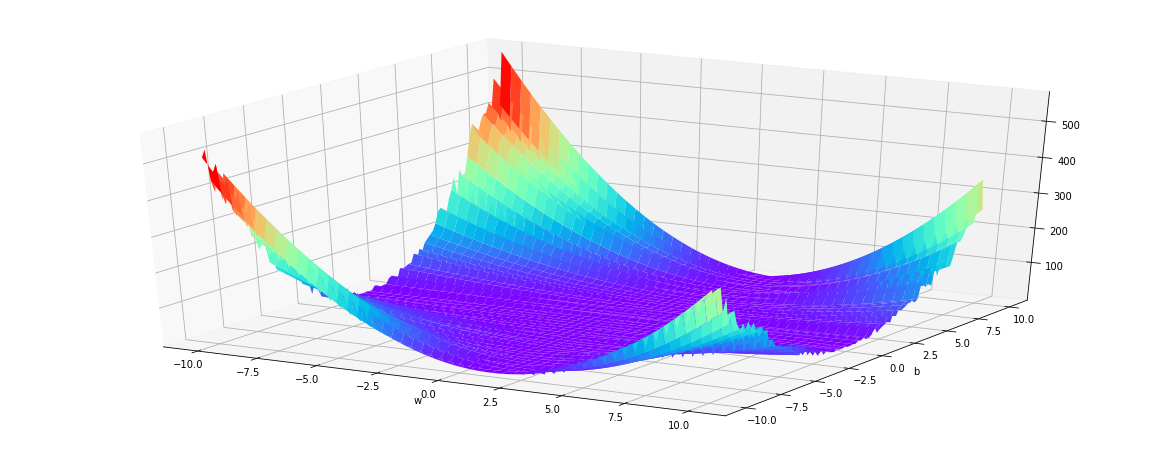

In [4]:
w_sample = np.linspace(-10, 10, data_count).reshape((-1, 1))
b_sample = np.linspace(-10, 10, data_count).reshape((-1, 1))

x_data = x_data.reshape((-1, 1))
y_data = y_data.reshape((-1, 1))

loss = np.square(np.dot(w_sample, x_data.T) + b_sample - y_data) / data_count

figure = plt.figure(figsize=(16, 6))
axes = Axes3D(figure)
axes.set_xlabel('w')
axes.set_ylabel('b')
axes.plot_surface(w_sample.T, b_sample, loss, cmap='rainbow')
plt.show()

可以看出，平方损失函数的图像大致呈一个抛物面形态，理论上是可以找到一个极值点使得损失函数取值达到最小的。

事实上，线性回归问题是可以使用最小二乘法来转化为一个**凸优化**问题的，但为了能够与一般的机器学习问题关联更紧密，在这里会采用**梯度下降**算法来优化参数的取值，与最小二乘法直接求得极值不同，梯度下降法是先随机指定一组参数值，然后通过不断迭代来寻找局部最优解。

## 4. 梯度下降



## References

- https://zhuanlan.zhihu.com/p/36553041